<a href="https://colab.research.google.com/github/tjrgh822/class_itsystem/blob/master/shuffle_training90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from __future__ import print_function
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


(x_train, y_train), (x_test, y_test) = mnist.load_data()


datagen = ImageDataGenerator( width_shift_range=3, 
                             height_shift_range=3, 
                             horizontal_flip=True, 
                             vertical_flip=True,
                             brightness_range = [0.2, 1.0],
                             rotation_range = 90,
                             zoom_range = [0.5, 1.0]
                             )
                             

nodatagen = ImageDataGenerator()



11493376/11490434 [==============================] - 0s 0us/step


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
x_train = np.load("/content/drive/My Drive/shuffledata_x+-45hard.npy")
y_train = np.load("/content/drive/My Drive/shuffledata_y+-45hard.npy")
y_train[0:10]

array([[5.],
       [0.],
       [4.],
       [1.],
       [9.],
       [2.],
       [1.],
       [3.],
       [1.],
       [4.]], dtype=float32)

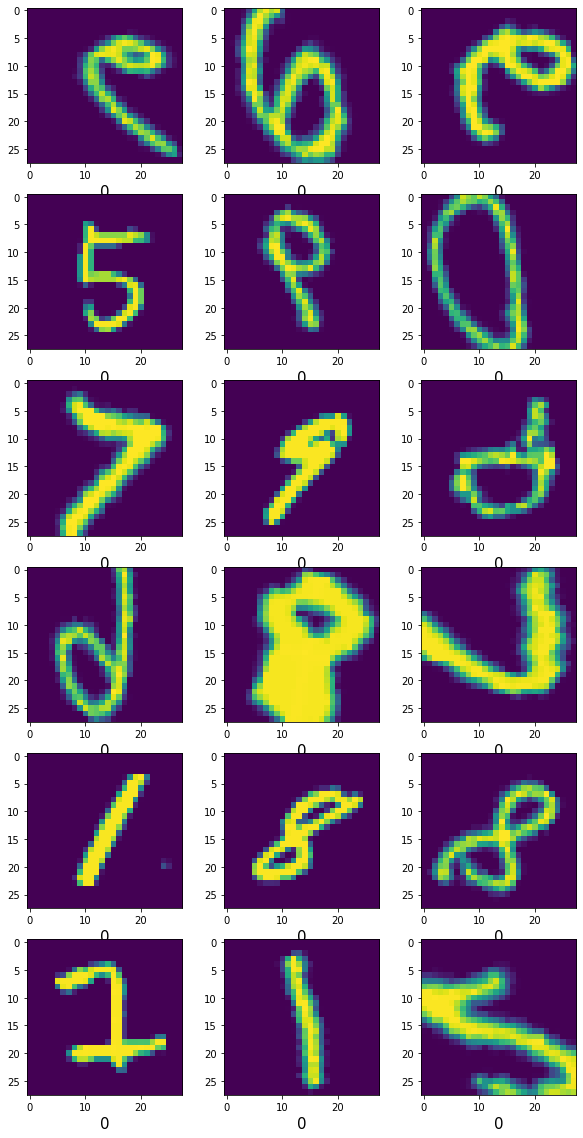

In [4]:
plt.figure(figsize=(10, 20))

for i, x in enumerate(np.random.randint(0, 10000, 18)):
  plt.subplot(6, 3, i+1)
  plt.xlabel(np.argmax(y_train[x], axis=0), fontsize= 15)
  plt.imshow(x_train[x].reshape(28, 28).astype(np.uint8))
plt.show()


In [0]:

'''
def onehotencoding(data, case):
  encoding = np.eye(case)[data]
  return encoding.reshape(-1, case)'''

'''y_train = np.argmax(y_train, axis=1).reshape(-1, 1)
y_train.shape
argu_y_test = np.argmax(argu_y_test, axis=1).reshape(-1, 1)'''

argu= datagen.flow(x_test.reshape(-1, 28, 28, 1), y_test, batch_size = x_test.shape[0], shuffle=False)

argu_y_test = argu[0][1]
argu_x_test = argu[0][0].reshape(-1, 28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
argu_y_test = keras.utils.to_categorical(argu_y_test,10)


In [6]:
#argu_y_test = np.argmax(argu_y_test, axis=1).reshape(-1, 1)
print(f"{x_train.shape}, {y_train.shape}\n{argu_x_test.shape}, {argu_y_test.shape}")

(90000, 28, 28, 1), (90000, 10)
(10000, 28, 28, 1), (10000, 10)


In [0]:
print(np.argmax(y_train, axis=1).reshape(-1, 1))

In [7]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    argu_x_test = argu_x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    argu_x_test = argu_x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)





model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), padding="valid", activation = "relu"))
# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))
# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 2048, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# 3rd Fully Connected Layer
model.add(Dense(1024, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation = "softmax")) #As we have two classes

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 256)         1

In [8]:

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, LearningRateScheduler

def scheduler(epoch):
  if epoch < 10:
    return 0.0001
  else:
    return 0.0001 * tf.math.exp(0.1 * (5 - epoch)/1.4)

Lschedule = LearningRateScheduler(scheduler)

batch_size = 100
epochs = 30

checkpointer = ModelCheckpoint(
    filepath='model_8.h5',
    save_best_only=True
)
early_stopping = EarlyStopping(patience=2)

callbacks=[checkpointer, early_stopping, Lschedule]

model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch = x_train.shape[0]/ batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(argu_x_test, argu_y_test),
          validation_steps = y_train.shape[0],
          callbacks= callbacks
          )

#score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/30
900/900 [==============================] - 67s 75ms/step - loss: 2.2696 - accuracy: 0.2923 - val_loss: 1.6426 - val_accuracy: 0.4249 - lr: 1.0000e-04
Epoch 2/30
900/900 [==============================] - 67s 75ms/step - loss: 1.7940 - accuracy: 0.4038 - val_loss: 1.2014 - val_accuracy: 0.5792 - lr: 1.0000e-04
Epoch 3/30
900/900 [==============================] - 66s 73ms/step - loss: 1.5559 - accuracy: 0.4777 - val_loss: 1.0279 - val_accuracy: 0.6448 - lr: 1.0000e-04
Epoch 4/30
900/900 [==============================] - 65s 72ms/step - loss: 1.3952 - accuracy: 0.5298 - val_loss: 0.8524 - val_accuracy: 0.7146 - lr: 1.0000e-04
Epoch 5/30
900/900 [==============================] - 64s 71ms/step - loss: 1.2774 - accuracy: 0.5700 - val_loss: 0.8101 - val_accuracy: 0.7289 - lr: 1.0000e-04
Epoch 6/30
900/900 [==============================] - 65s 72ms/step - loss: 1.1856 - accuracy: 0.6026 - val_loss: 0.6914 - val_accuracy: 0.7707 - lr: 1.0000e-04
Epoch 7/30
900/900 [==============

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, LearningRateScheduler



In [0]:
!ls

In [9]:
from keras.models import load_model

model.save('model_8.h5')

from google.colab import files
files.download('model_8.h5')

Using TensorFlow backend.
----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 51690, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in c